# BPT DIAGRAM

BPT diagrams, named after Baldwin, Phillips, and Terlevich, are crucial tools in astrophysics for classifying galaxies based on their emission line ratios, particularly in distinguishing between star-forming galaxies and active galactic nuclei (AGN).
* We are going to use SDSS dataset to plot the BPT diagram.
* SDSS (Sloan digital sky survey) is a project that aim to create a map of the universe. It contains huge dataset from the universe observations.

The main task is to specify the galaxy type (we are studying)  (If it have an AGN or has high star formation rate ... etc) on the BPT diagram.

In [ ]:
# Download this first
# ! pip install astroquery

In [15]:
from astroquery.sdss import SDSS
import numpy as np
import matplotlib.pyplot as plt

In [73]:

query = """
SELECT TOP 20000          --- SELECT 1000 random lines including the listed fields
    -- s.plate,
    -- s.mjd,
    -- s.fiberid, 
    s.z,                 --- Redshift values for each Object.
    -- s.class,             --- Choose out of these: Galaxy, star....etc.
    g.h_alpha_flux,      --- Flux values 
    g.nii_6584_flux,
    g.h_beta_flux,        --- Flux values   
    g.oiii_5007_flux	
    
      
FROM
    GalSpecLine AS g, SpecObj AS s
WHERE
    s.specobjid = g.specobjid                     --- This is essential to ensure tables are matched and remain aligned
    AND s.class = 'GALAXY'
    AND g.h_alpha_flux > 5*g.h_alpha_flux_err
    AND g.h_beta_flux  > 5*g.h_beta_flux_err
    AND 0.1 > s.z  AND s.z > 0.04 
    AND g.sigma_balmer < 500
    AND s.zWarning = 0
"""

gals = SDSS.query_sql(query, data_release=18) # Execute the query (Send query to SDSS)     
print(gals)

    z      h_alpha_flux nii_6584_flux h_beta_flux oiii_5007_flux
---------- ------------ ------------- ----------- --------------
0.07965201     83.65855      28.64763    22.88907        9.92093
0.08935121     102.5741      37.54624    26.95425       8.426869
0.09367687     211.3983       143.802    41.23113       13.67821
0.09845868     195.7264      124.9492    35.05587       12.91417
0.09498237     258.3044      105.9083    56.68415       38.59486
0.09804763     311.0261      108.5181    78.53085       19.06509
0.09451768      59.1315      30.73882    13.75935       4.113733
0.07955465     277.2243      100.6094    65.24599       8.537987
0.04658309     551.4218      53.89565    211.7393        578.579
0.09519172     88.99931      45.33305    22.79305        15.1907
       ...          ...           ...         ...            ...
0.05622626     138.6217      37.72808    43.08791       25.17259
0.08591569     333.3306      143.0288    63.51797       18.20563
0.08856037     759.1016  

Higher OIII leads to higher ionization rate.
Higher NII  leads to higher temprature. (NII requires high energy photons to be formed)


C:\Users\demet\AppData\Local\Temp\ipykernel_21616\1267354653.py:7: RuntimeWarning: divide by zero encountered in divide
  nii_ax = np.log10(nii_f/h_alph_f)
C:\Users\demet\AppData\Local\Temp\ipykernel_21616\1267354653.py:7: RuntimeWarning: invalid value encountered in divide
  nii_ax = np.log10(nii_f/h_alph_f)
C:\Users\demet\AppData\Local\Temp\ipykernel_21616\1267354653.py:7: RuntimeWarning: invalid value encountered in log10
  nii_ax = np.log10(nii_f/h_alph_f)
C:\Users\demet\AppData\Local\Temp\ipykernel_21616\1267354653.py:8: RuntimeWarning: divide by zero encountered in log10
  oiii_ax = np.log10(oiii_f/h_beta_f)
C:\Users\demet\AppData\Local\Temp\ipykernel_21616\1267354653.py:8: RuntimeWarning: invalid value encountered in log10
  oiii_ax = np.log10(oiii_f/h_beta_f)


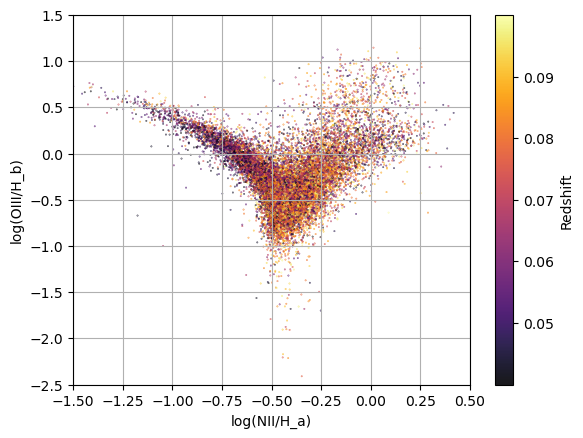

In [80]:
h_alph_f = gals['h_alpha_flux']
nii_f = gals['nii_6584_flux']

h_beta_f = gals['h_beta_flux']
oiii_f = gals['oiii_5007_flux']

nii_ax = np.log10(nii_f/h_alph_f)
oiii_ax = np.log10(oiii_f/h_beta_f)

redshift = gals['z']
bpt = plt.subplot()
scatter = bpt.scatter(nii_ax,oiii_ax, s = 0.1, alpha=0.9 , c = redshift, cmap= 'inferno')
scatter
bpt.set_xlabel('log(NII/H_a)')
bpt.set_ylabel('log(OIII/H_b)') 
bpt.set_xlim(-1.5,0.5)
bpt.set_ylim(-2.5,1.5)
bpt.get_tightbbox()
bpt.grid()
plt.colorbar(scatter, label= 'Redshift')
plt.show()

AGNs are on the high right side. High tempratures and ionization rate.
On the right with low redshift values, high ionization rate due to the stars (High SFR).